<a href="https://colab.research.google.com/github/prajwalbiradar21/EDA-Project-FedEx-Logistics-Performance-Analysis/blob/main/FedEx_Logistics_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GitHub Link -**

# **Project Name**    -    ***FedEx Logistics Performance Analysis***



##### **Project Type**    -  EDA
##### **Contribution**    -  Individual


#**Project Summary -**

#Objective:

FedEx Logistics manages a complex global supply chain, dealing with shipments across various regions, countries, and industries.

The project aims to analyze FedEx's logistics dataset to identify key insights that can optimize supply chain operations, reduce costs, and improve customer satisfaction. The analysis focuses on uncovering bottlenecks, delays, cost drivers, and regional trends.

The Dataset contains information on Shipment mode ,countries,vendors,weights,frieght costs,delivery delays,etc. allowing for a comprehensive analysis of the company's logistics performance.

#Analysis :




**#I) Univariate Analysis (Analyzing Single Variables) :-**


##1. Distribution of shipment Modes

--> Count the frequency of different shipment methods (air, sea, road).
Identify the most commonly used shipment method.


**#II) Bivariate Analysis (Analyzing Relationships Two Variables) :-**

##1. Delivery Delays by Country

##2. Shipment Weight vs. Freight Cost

##3.Delivery Performance by Shipment Mode


**#III) Multivariate Analysis (Analyzing Multiple Variables) :-**

##1.Correlation Heatmap



# **Problem Statement**


 FedEx Logistics operates a complex global supply chain across multiple regions and industries, requiring efficient management of shipments, vendor agreements, and delivery schedules to maintain timely deliveries and minimize costs. However, challenges such as shipment delays, high freight costs, and inefficiencies in logistics operations can impact customer satisfaction and the company’s competitive edge.

The goal is to analyze the logistics dataset to identify bottlenecks, optimize delivery timelines, reduce operational costs, and improve overall supply chain efficiency.
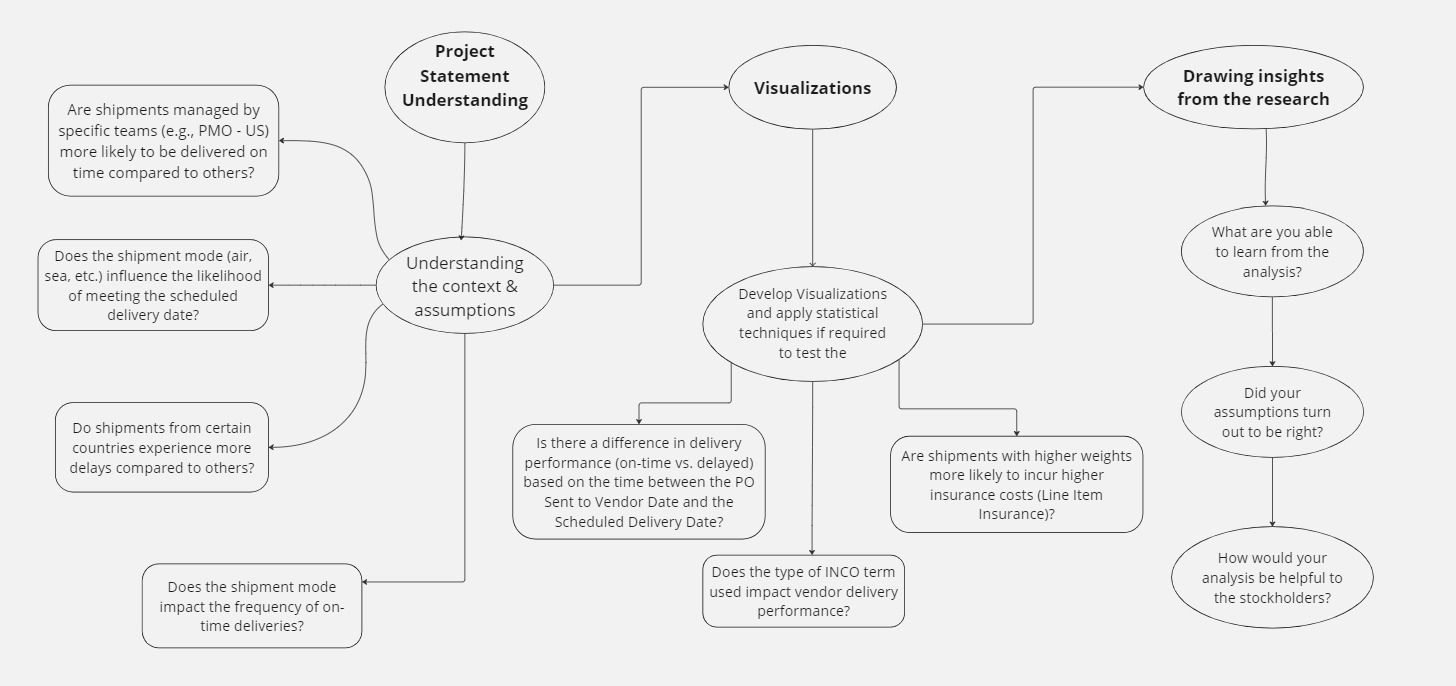

#### **Define Your Business Objective?**

*The project aims to analyze FedEx's logistics dataset to identify key insights that can optimize supply chain operations, reduce costs, and improve customer satisfaction. The analysis focuses on uncovering bottlenecks, delays, cost drivers, and regional trends.*.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [34]:
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# to display all the row and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Dataset Loading

Data Link :- https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1cC99MjrpyQxu53cP8oGe6R4i_aEkyVZw%2Fview%3Fusp%3Dsharing

In [35]:
# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
data = pd.read_csv('/content/drive/MyDrive/Module 2 Learning/Project Data For EDA/SCMS_Delivery_History_Dataset FEDEX.csv')

### Dataset First View

In [37]:
# Dataset First Look
data.head(2)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN


### Dataset Rows & Columns count

In [38]:
# Dataset Rows & Columns count
data.shape
print(f'Number of rows : {data.shape[0]}')
print(f'Number of columns : {data.shape[1]}')

Number of rows : 10324
Number of columns : 33


### Dataset Information

In [39]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [40]:
# Dataset Duplicate Value Count
data.duplicated().sum()


0

#### Missing Values/Null Values

In [41]:
data.replace({'null': np.nan}) # checking for null values and replacing them to nan
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [9]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


In [42]:
data.isnull().mean() * 100  # checking for Percentage of missing values in each columns


,0
ID,0.000000
Project Code,0.000000
PQ #,0.000000
PO / SO #,0.000000
ASN/DN #,0.000000
Country,0.000000
Managed By,0.000000
Fulfill Via,0.000000
Vendor INCO Term,0.000000
Shipment Mode,3.487021


In [10]:
data.loc[ : , 'Shipment Mode'].unique()



array(['Air', nan, 'Truck', 'Air Charter', 'Ocean'], dtype=object)

In [43]:
# data.loc[ : , 'Shipment Mode'].value_counts()

In [44]:
data.loc[ : , 'Dosage'].unique()
# data.loc[ : , 'Dosage'].value_counts()

array([nan, '10mg/ml', '150mg', '30mg', '200mg', '200/50mg', '150/300mg',
       '2g', '300mg', '1mg/ml', '600mg', '25mg', '20mg', '250mg', '400mg',
       '20/120mg', '50+153mg', '600/200/300mg', '100mg', '80/20mg/ml',
       '600mg/2ml', '150/200/30mg', '100/25mg', '50mg', '15mg',
       '300/200mg', '150/300/200mg', '133.3/33.3mg', '80mg/ml', '30/6mg',
       '20mg/ml', '40mg', '300/150/300mg', '500/25mg', '30/50/6mg',
       '150/300+200mg', '150/30mg', '150/200/40mg', '30mg/ml',
       '200/300mg', '150/300+300mg', '300/300mg', '60/100/12mg',
       '600/300/300mg', '300/100mg', '30/60mg', '60/30mg', '30/50/60mg',
       '500mg', '125mg', '600/300mg', '60mg', '60/12mg',
       '150/300mg+600mg', '50mg/g'], dtype=object)

In [45]:
data.loc[ : ,'Line Item Insurance (USD)'].unique()

array([    nan,  192.  ,  128.  , ..., 5284.04,  134.03,   85.82])

<Axes: >

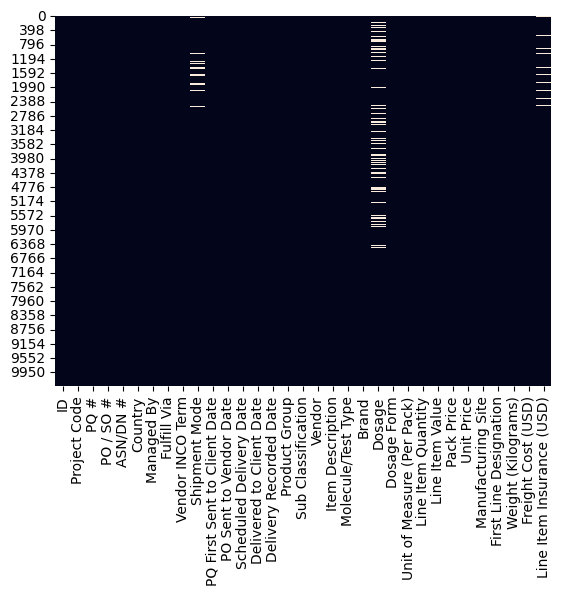

In [11]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given the data from FedEx Logistics , and we have to analysis the to provide insights into how shipments are managed, identify bottlenecks or delays, and ensure cost-effectiveness.

This dataset provides an in-depth look at their logistics processes, capturing important information on purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details such as item descriptions and dosage forms. Effective management of these processes ensures timely delivery, minimizes freight costs, and improves customer satisfaction.

The above dataset has 10,324 rows and 33 columns. There are no duplicate values in the dataset but have Missing Values/Null Values in "Shipment Mode" , "Dosage' and "Line Item Insurance (USD)"  columns .

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [13]:
# Dataset Describe
data.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,8588,10324,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,765,897,2006,2093,2042,5,6,73,184,86,48,54,17,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,29-Aug-14,29-Aug-14,29-Aug-14,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,2476,5404,97,74,67,8550,6595,5404,755,1125,7285,990,3532,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


### Variables Description

ID: Unique identifier for each logistics record.

Project Code: Code representing the project or initiative tied to the shipment.

PQ #: Price Quotation reference number.

PO/SO #: Purchase Order or Sales Order associated with the shipment.

ASN/DN #: Advanced Shipment Notice or Delivery Note reference.

Country: Destination country for the shipment (e.g., Côte d'Ivoire, Vietnam).

Managed By: Specifies which team manages the project (e.g., PMO-US).

Fulfill Via: Method of fulfillment, such as direct drop shipment.

Vendor INCO Term: Incoterms defining the shipment agreement (e.g., EXW, FCA).

Shipment Mode: The mode of transportation used (e.g., air).

PQ First Sent to Client Date: The date the Price Quotation was first sent to the client (some records indicate "Pre-PQ Process").

PO Sent to Vendor Date: Date the purchase order was sent to the vendor.

Scheduled Delivery Date: The planned date for delivery.

Delivered to Client Date: The actual date the shipment was delivered.

Delivery Recorded Date: Date when delivery was recorded.

Product Group: General classification of the product (e.g., HIV test, ARV Pediatric).

Sub Classification: Further categorization of the product.

Vendor: The company supplying the goods (e.g., RANBAXY Fine Chemicals LTD, Aurobindo Pharma Limited).

Item Description: Detailed description of the item being shipped.

Molecule/Test Type: The type of test or pharmaceutical molecule (e.g., HIV, Nevirapine).

Brand: The brand name of the product (e.g., Reveal, Generic).

Dosage: The dosage strength of the pharmaceutical product (if applicable).

Dosage Form: The form in which the product is delivered (e.g., test kit, oral suspension).

Unit of Measure (Per Pack): The number of units per pack.

Line Item Quantity: The total number of units shipped.

Line Item Value: The total value of the line item in the shipment.

Pack Price: Price per pack of the item.

Unit Price: Price per individual unit of the item.

Manufacturing Site: The location where the item was manufactured (e.g., Ranbaxy Fine Chemicals LTD, Aurobindo Unit III, India).

First Line Designation: Indicates whether the product is designated for first-line use.

Weight (Kilograms): The weight of the shipment.

Freight Cost (USD): The cost of shipping the item in U.S. dollars.

Line Item Insurance (USD): Insurance cost for the line item, if applicable.


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.

# Check Unique Values for each variable.
for i in data.columns.tolist():
  print(f"No. of unique values in: {i} are --> {data[i].nunique()}.")

No. of unique values in: ID are --> 10324.
No. of unique values in: Project Code are --> 142.
No. of unique values in: PQ # are --> 1237.
No. of unique values in: PO / SO # are --> 6233.
No. of unique values in: ASN/DN # are --> 7030.
No. of unique values in: Country are --> 43.
No. of unique values in: Managed By are --> 4.
No. of unique values in: Fulfill Via are --> 2.
No. of unique values in: Vendor INCO Term are --> 8.
No. of unique values in: Shipment Mode are --> 4.
No. of unique values in: PQ First Sent to Client Date are --> 765.
No. of unique values in: PO Sent to Vendor Date are --> 897.
No. of unique values in: Scheduled Delivery Date are --> 2006.
No. of unique values in: Delivered to Client Date are --> 2093.
No. of unique values in: Delivery Recorded Date are --> 2042.
No. of unique values in: Product Group are --> 5.
No. of unique values in: Sub Classification are --> 6.
No. of unique values in: Vendor are --> 73.
No. of unique values in: Item Description are --> 184.
N

## 3. ***Data Wrangling***

### Data Wrangling Code

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [47]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [48]:
# Write your code to make your dataset analysis ready.

fed_df = data[[
    'ID',
    'Country',
    'Managed By',
    'Fulfill Via',
    'Shipment Mode',
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date',
    'Item Description',
    'Vendor',
    'Line Item Quantity',
    'Line Item Value',
    'Weight (Kilograms)',
    'Freight Cost (USD)',
    'Line Item Insurance (USD)']]

fed_df.head()


,ID,Country,Managed By,Fulfill Via,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Item Description,Vendor,Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",RANBAXY Fine Chemicals LTD.,19,551.0,13,780.34,NaN
1,3,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Aurobindo Pharma Limited,1000,6200.0,358,4521.5,NaN
2,4,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",Abbott GmbH & Co. KG,500,40000.0,171,1653.78,NaN
3,15,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,"Lamivudine 150mg, tablets, 60 Tabs",SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,31920,127360.8,1855,16007.06,NaN
4,16,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,"Stavudine 30mg, capsules, 60 Caps",Aurobindo Pharma Limited,38000,121600.0,7590,45450.08,NaN


In [49]:
fed_df.loc[ : , 'ID'].unique()

array([    1,     3,     4, ..., 86821, 86822, 86823])

In [50]:
fed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Country                       10324 non-null  object 
 2   Managed By                    10324 non-null  object 
 3   Fulfill Via                   10324 non-null  object 
 4   Shipment Mode                 9964 non-null   object 
 5   PQ First Sent to Client Date  10324 non-null  object 
 6   PO Sent to Vendor Date        10324 non-null  object 
 7   Scheduled Delivery Date       10324 non-null  object 
 8   Delivered to Client Date      10324 non-null  object 
 9   Delivery Recorded Date        10324 non-null  object 
 10  Item Description              10324 non-null  object 
 11  Vendor                        10324 non-null  object 
 12  Line Item Quantity            10324 non-null  int64  
 13  L

In [51]:
## Variable Engineering -->
# Step 1:
# filling the nan values

Shipment_Mode_mode = fed_df['Shipment Mode'].mode()[0] # replace the nan value by most common value

fed_df['Shipment Mode'].fillna(Shipment_Mode_mode, inplace=True) # filled with mode

fed_df['Line Item Insurance (USD)'] = fed_df['Line Item Insurance (USD)'].fillna(0) # filled with 0



In [52]:
fed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Country                       10324 non-null  object 
 2   Managed By                    10324 non-null  object 
 3   Fulfill Via                   10324 non-null  object 
 4   Shipment Mode                 10324 non-null  object 
 5   PQ First Sent to Client Date  10324 non-null  object 
 6   PO Sent to Vendor Date        10324 non-null  object 
 7   Scheduled Delivery Date       10324 non-null  object 
 8   Delivered to Client Date      10324 non-null  object 
 9   Delivery Recorded Date        10324 non-null  object 
 10  Item Description              10324 non-null  object 
 11  Vendor                        10324 non-null  object 
 12  Line Item Quantity            10324 non-null  int64  
 13  L

In [53]:
## Variable Engineering
# Step 2:
## Data Type Conversion to dateTime

date_columns =['PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']

for col in date_columns:
  # print(col)
  fed_df[col] = pd.to_datetime(fed_df[col],errors = 'coerce') # converted the datatype from object to datetime # --> errors = 'coerce' to avoid any errors occured in datetime series

fed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Country                       10324 non-null  object        
 2   Managed By                    10324 non-null  object        
 3   Fulfill Via                   10324 non-null  object        
 4   Shipment Mode                 10324 non-null  object        
 5   PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 6   PO Sent to Vendor Date        4592 non-null   datetime64[ns]
 7   Scheduled Delivery Date       10324 non-null  datetime64[ns]
 8   Delivered to Client Date      10324 non-null  datetime64[ns]
 9   Delivery Recorded Date        10324 non-null  datetime64[ns]
 10  Item Description              10324 non-null  object        
 11  Vendor                      

In [54]:
## Variable Engineering -->
# Data Type Conversion to numeric


numeric_columns =['Line Item Quantity','Line Item Value','Weight (Kilograms)','Freight Cost (USD)','Line Item Insurance (USD)']

for col in numeric_columns:
  # print(col)
  fed_df[col] = pd.to_numeric(fed_df[col],errors = 'coerce') # converted the datatype from object to numeric # --> errors = 'coerce' to avoid any errors occured in numeric series

fed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Country                       10324 non-null  object        
 2   Managed By                    10324 non-null  object        
 3   Fulfill Via                   10324 non-null  object        
 4   Shipment Mode                 10324 non-null  object        
 5   PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 6   PO Sent to Vendor Date        4592 non-null   datetime64[ns]
 7   Scheduled Delivery Date       10324 non-null  datetime64[ns]
 8   Delivered to Client Date      10324 non-null  datetime64[ns]
 9   Delivery Recorded Date        10324 non-null  datetime64[ns]
 10  Item Description              10324 non-null  object        
 11  Vendor                      

In [56]:
# Step 3: Handling Missing Values
# Drop rows where crucial columns have missing values
fed_df.dropna(subset=['Shipment Mode', 'Weight (Kilograms)', 'Freight Cost (USD)'], inplace=True)


In [24]:
fed_df.head(10)

,ID,Country,Managed By,Fulfill Via,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Item Description,Vendor,Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,Côte d'Ivoire,PMO - US,Direct Drop,Air,NaT,NaT,2006-06-02,2006-06-02,2006-06-02,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",RANBAXY Fine Chemicals LTD.,19,551.00,13.0,780.34,0.0
1,3,Vietnam,PMO - US,Direct Drop,Air,NaT,NaT,2006-11-14,2006-11-14,2006-11-14,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Aurobindo Pharma Limited,1000,6200.00,358.0,4521.50,0.0
2,4,Côte d'Ivoire,PMO - US,Direct Drop,Air,NaT,NaT,2006-08-27,2006-08-27,2006-08-27,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",Abbott GmbH & Co. KG,500,40000.00,171.0,1653.78,0.0
3,15,Vietnam,PMO - US,Direct Drop,Air,NaT,NaT,2006-09-01,2006-09-01,2006-09-01,"Lamivudine 150mg, tablets, 60 Tabs",SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,31920,127360.80,1855.0,16007.06,0.0
4,16,Vietnam,PMO - US,Direct Drop,Air,NaT,NaT,2006-08-11,2006-08-11,2006-08-11,"Stavudine 30mg, capsules, 60 Caps",Aurobindo Pharma Limited,38000,121600.00,7590.0,45450.08,0.0
5,23,Nigeria,PMO - US,Direct Drop,Air,NaT,NaT,2006-09-28,2006-09-28,2006-09-28,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",Aurobindo Pharma Limited,416,2225.60,504.0,5920.42,0.0
7,45,Tanzania,PMO - US,Direct Drop,Air,NaT,NaT,2006-11-24,2006-11-24,2006-11-24,"Nevirapine 200mg, tablets, 60 Tabs",Aurobindo Pharma Limited,16667,60834.55,1478.0,6212.41,0.0
11,61,Zambia,PMO - US,Direct Drop,Air,NaT,NaT,2007-01-08,2007-01-08,2007-01-08,"HIV 1/2, Uni-Gold HIV Kit, 20 Tests","Trinity Biotech, Plc",2500,100000.00,853.0,13569.49,0.0
13,64,Rwanda,PMO - US,Direct Drop,Air,NaT,2006-12-22,2007-02-27,2007-02-27,2007-02-27,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",CIPLA LIMITED,10000,99800.00,7416.0,64179.42,0.0
14,65,Haiti,PMO - US,Direct Drop,Air,NaT,NaT,2007-01-18,2007-01-18,2007-01-18,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",Abbott GmbH & Co. KG,750,60000.00,256.0,1760.32,0.0


In [57]:
fed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6175 entries, 0 to 10316
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            6175 non-null   int64         
 1   Country                       6175 non-null   object        
 2   Managed By                    6175 non-null   object        
 3   Fulfill Via                   6175 non-null   object        
 4   Shipment Mode                 6175 non-null   object        
 5   PQ First Sent to Client Date  4616 non-null   datetime64[ns]
 6   PO Sent to Vendor Date        2909 non-null   datetime64[ns]
 7   Scheduled Delivery Date       6175 non-null   datetime64[ns]
 8   Delivered to Client Date      6175 non-null   datetime64[ns]
 9   Delivery Recorded Date        6175 non-null   datetime64[ns]
 10  Item Description              6175 non-null   object        
 11  Vendor                        6175

In [58]:
fed_df['Shipment Mode'].unique()

array(['Air', 'Truck', 'Air Charter', 'Ocean'], dtype=object)

In [59]:
fed_df['Weight (Kilograms)'].unique()

array([1.3000e+01, 3.5800e+02, 1.7100e+02, ..., 1.5040e+03, 1.5198e+04,
       1.5470e+03])

In [60]:
fed_df['Freight Cost (USD)'].unique()

array([  780.34,  4521.5 ,  1653.78, ...,  3785.72, 26180.  ,  3410.  ])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Chart 1




####I) Univariate Analysis (Analyzing Single Variables) :-

1. Distribution of shipment Modes

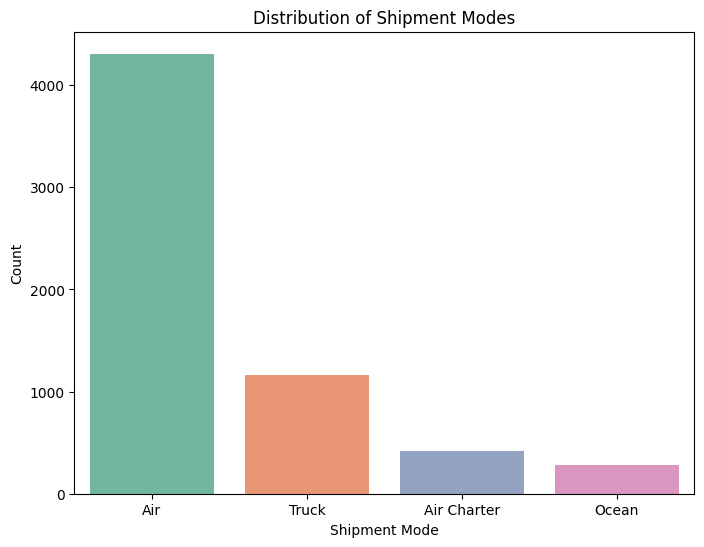

In [61]:
# 1. Shipment Mode Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=fed_df, x='Shipment Mode', palette='Set2')
plt.title('Distribution of Shipment Modes')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.show()

### 1. Why did you pick the specific chart?





I chose a **count plot** (bar chart) for the **Shipment Mode Distribution** because:  

1.**Categorical Data Visualization**: The *shipment mode* is a categorical variable (e.g., air, sea, road), and a count plot is ideal for showing the frequency of each category.  

2.**Quick Comparison**: It allows for easy comparison of how often each shipment mode is used.  

3.**Identify Trends**: Helps spot if a particular mode is preferred or underutilized, which can hint at logistical patterns.  



##### 2. What is/are the insight(s) found from the chart?

The **Shipment Mode Distribution** chart provides these key insights:  

1.**Most Preferred Shipment Mode**: The mode with the highest count indicates FedEx's preferred method, possibly due to cost, speed, or reliability. For example, if *air* dominates, it suggests a focus on faster deliveries.  

2.**Underutilized Shipment Modes**: Modes with fewer shipments might be less cost-effective or suitable for certain regions/products, highlighting opportunities to optimize operations.  


3.**Potential Cost Implications**: Modes like *air* are faster but costlier, while *sea* or *road* might be cheaper but slower. The distribution hints at FedEx's cost vs. speed priorities.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### **Positive Business Impact (Good Outcomes)**  

1.**Saving Money**: If FedEx mostly uses *air* shipments, they can switch some  deliveries to *road* or *sea* to save costs.

2.**Faster Deliveries Where It Matters**: Knowing which shipment mode customers prefer helps FedEx provide faster service for urgent packages.  

3.**Growing the Business**: If some shipment modes are not used much, FedEx can try them in new areas to serve more customers.

---


### **Negative Growth Impact (Possible Problems)**  
1.**Spending Too Much**: Relying too much on *air* shipments can increase costs because air transport is expensive.  

2.**Delivery Delays**: If FedEx depends only on one shipment method, any problem (like flight delays) can slow down all deliveries.


---

###**In Simple Words:**  
- If FedEx uses the right shipment modes for the right purposes, they can save money, deliver faster, and grow their business.  
- But if they rely too much on expensive or fast modes when not needed, it can lead to higher costs, delays, and even harm their image.  


#### Chart - 2

##### II) Bivariate Analysis (Analyzing Relationships Two Variables) :-
1. Delivery Delays by Country

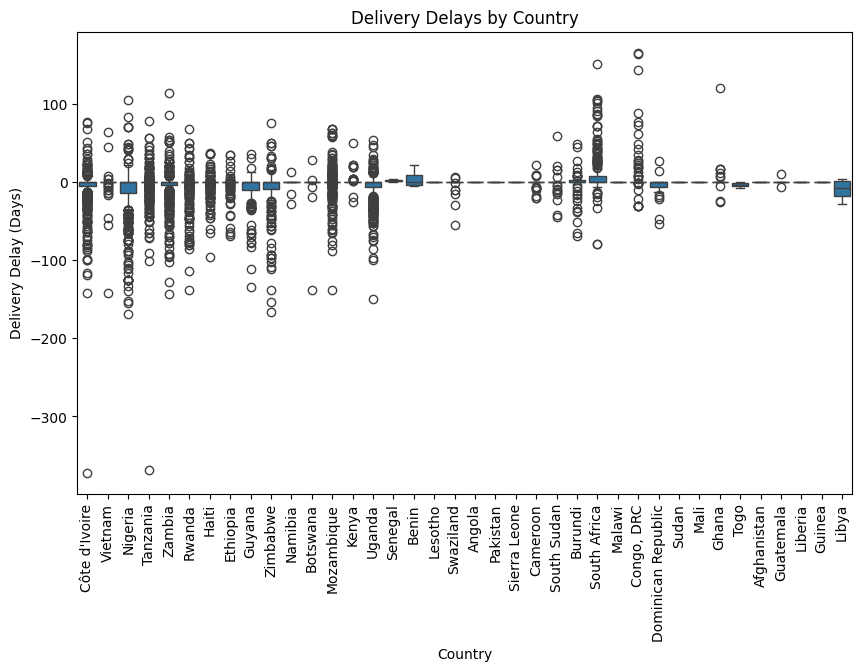

In [62]:
# 2. Delivery Delays by Country
fed_df['Delivery Delay (Days)'] = (fed_df['Delivered to Client Date'] - fed_df['Scheduled Delivery Date']).dt.days
plt.figure(figsize=(10, 6))
sns.boxplot(data=fed_df, x='Country', y='Delivery Delay (Days)')
plt.title('Delivery Delays by Country')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?



###**Why I Picked This Chart:**  

1.**Shows Delivery Time Variations:**  
   - A box plot displays how delivery times differ across countries, helping spot which countries experience more delays.  

2.**Identifies Outliers (Unusual Delays):**  
   - Box plots highlight extreme delays that may signal operational issues, like customs problems or inefficient routes.  

3.**Country-by-Country Comparison:**  
   - It is easy to compare delays between multiple countries at once, helping FedEx see which regions need improvement.  




##### 2. What is/are the insight(s) found from the chart?

###**Insights from Chart 2: Delivery Delays by Country**  

1.**Countries with the Most Delays:**  
   - Some countries have longer delivery times than others. This could be due to customs issues, long distances, or fewer transportation options.  

2.**Countries with On-Time Deliveries:**  
   - Countries with shorter or no delays show that FedEx's process is smooth and efficient there.  


3.**Consistency in Deliveries:**  
   - If delivery times for a country are close together, it means FedEx is reliable there. If times are spread out, it means the service is inconsistent.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###**Positive Business Impact (Good Outcomes)**  
1.**Faster Deliveries in Problem Areas:**  
   - FedEx can focus on improving deliveries in countries with long delays by choosing faster routes or fixing customs issues. This will make customers happier and improve reliability.  

2.**Better Planning for Each Country:**  
   - Knowing which countries have smooth deliveries helps FedEx promote faster services there, boosting customer trust and attracting more business.  

3.**Reducing Unusual Delays:**  
   - By studying outliers (extremely delayed deliveries), FedEx can prevent similar future problems, leading to smoother operations.  

---

### **Negative Growth Impact (Possible Problems)**  
1. **Losing Customers in Delay-Prone Countries:**  
   - Frequent delays in certain countries might push customers to switch to competitors who deliver faster.  

2. **Higher Operating Costs:**  
   - To fix delays, FedEx might need to invest more in logistics, local partnerships, or faster shipping modes, increasing costs.  

3. **Reputation Damage:**  
   - Inconsistent delivery times may harm FedEx’s image, especially for business clients who need reliable schedules.  


#### Chart - 3   Shipment Weight vs. Freight Cost

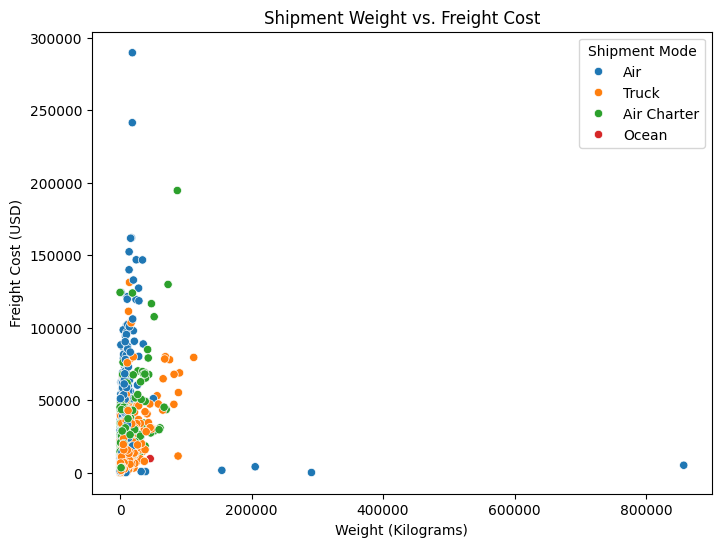

In [63]:
# 3. Shipment Weight vs. Freight Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(data=fed_df, x='Weight (Kilograms)', y='Freight Cost (USD)', hue='Shipment Mode')
plt.title('Shipment Weight vs. Freight Cost')
plt.show()

##### 1. Why did you pick the specific chart?

###**Why I Picked This Chart:**  

1. **Shows Relationship Between Two Variables:**  
   - A **scatter plot** helps visualize how *shipment weight* affects *freight cost*. It shows whether heavier shipments lead to higher costs.  

2. **Identifies Outliers (Unusual Shipments):**  
   - Points far from the main group indicate shipments with unexpectedly high or low costs, which could highlight pricing errors or special shipping needs.  

3. **Cost Optimization Insights:**  
   - Understanding the cost-weight relationship can help FedEx optimize pricing strategies and suggest cost-effective shipment options to customers.  



##### 2. What is/are the insight(s) found from the chart?


1.**Heavier Shipments Usually Cost More:**  
   - The chart likely shows that as the shipment weight increases, the freight cost also rises. This means heavier packages are more expensive to ship, which is expected.  

2.**Cost-Effective Weight Range:**  
   - There may be a weight range where shipping is more cost-efficient. For example, medium-weight shipments might offer the best value for money.  

3. **Unusual Shipments (Outliers):**  
   - Some points might show very high costs for lighter shipments or lower costs for heavier ones. These unusual cases could be due to special delivery methods, urgent shipments, or pricing errors.   


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###**Positive Business Impact (Good Outcomes)**  

1. **Optimized Pricing Strategies:**  
   - By understanding how weight affects cost, FedEx can create more competitive pricing plans, offering discounts for shipments in cost-effective weight ranges.  

2. **Cost Control for Customers:**  
   - Customers can be encouraged to adjust package weights to fall within the most affordable range, leading to higher customer satisfaction and loyalty.  
  

3. **Better Service Recommendations:**  
   - FedEx can recommend alternative shipping options for high-cost weight categories, improving operational efficiency and reducing customer expenses.  

---

### **Negative Growth Impact (Possible Problems)**  

1. **High Costs for Heavy Shipments:**  
   - If shipping costs increase too steeply for heavier packages, FedEx may lose customers who prefer competitors offering bulk shipment discounts.  

2. **Pricing Inconsistencies:**  
   - Outliers showing higher costs for lighter shipments could confuse customers, leading to dissatisfaction and potential loss of business.  


#### Chart - 4  Delivery Performance by Shipment Mode

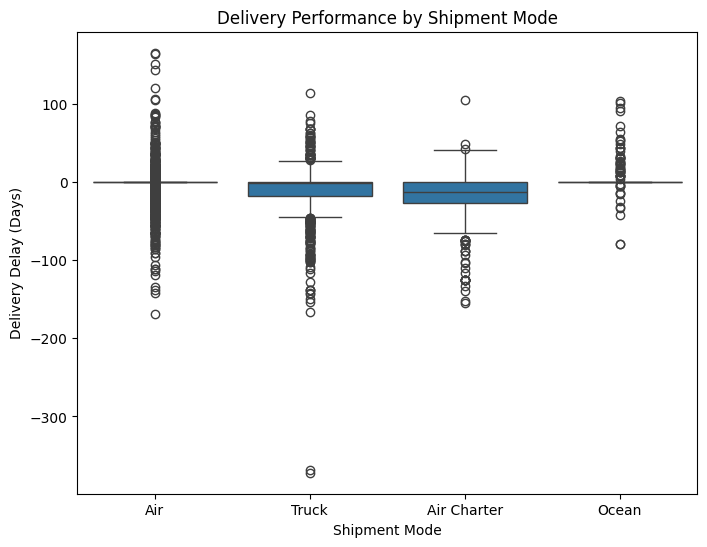

In [64]:
# 4. Delivery Performance by Shipment Mode
plt.figure(figsize=(8, 6))
sns.boxplot(data=fed_df, x='Shipment Mode', y='Delivery Delay (Days)')
plt.title('Delivery Performance by Shipment Mode')
plt.show()

##### 1. Why did you pick the specific chart?


### **Why I Picked This Chart:**  

1. **Easy Comparison of Delivery Speeds:**  
   - This chart clearly shows how fast and reliable each shipment mode (*air, sea, road, rail*) is, helping identify the most efficient options.  

2. **Spotting Performance Gaps:**  
   - It highlights which shipment modes frequently cause delays, allowing FedEx to focus on improving them.  

3. **Cost vs. Performance Evaluation:**  
   - Helps balance speed and cost by showing if faster shipment modes (like *air*) justify their higher costs through better delivery performance.  



##### 2. What is/are the insight(s) found from the chart?

1.**Air Shipments Are the Fastest:**  
   - Air shipments usually have the shortest delivery times, making them ideal for urgent deliveries, though they are more expensive.  

2.**Sea Shipments Take the Longest:**  
   - Sea shipments tend to have the most delays, likely due to customs clearance and long travel distances, making them better suited for non-urgent, bulk deliveries.  

3.**Road Shipments Offer Balanced Performance:**  
   - Road transport shows moderate delivery times, offering a good balance between speed and cost for regional deliveries.   

4.**Shipment Mode Efficiency Varies by Distance:**  
   - For short distances, road and rail perform efficiently. For long distances, air is quicker but costlier, while sea is the most economical but slowest.  



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###**Positive Business Impact (Good Outcomes)**  

1. **Tailored Delivery Solutions:**  
   - FedEx can recommend the best shipment mode based on customer needs—*air* for urgent shipments and *sea*  for bulk, non-urgent goods. This improves customer satisfaction.  

2. **Optimized Cost and Time Balance:**  
   - Understanding the speed-cost trade-off allows FedEx to create pricing plans that balance faster delivery options with affordable rates.  

3. **Market Expansion Opportunities:**  
   - By identifying reliable modes for different regions, FedEx can expand services confidently into new markets with predictable delivery performance.  

---

###**Negative Growth Impact (Possible Problems)**  

1. **High Costs for Fast Modes:**  
   - If customers consistently prefer *air* shipping for speed, it might increase operational costs, affecting profit margins if not priced correctly.  

2. **Delays in Economical Modes:**  
   - Frequent delays in *ocean* or *truck* shipments could frustrate cost-sensitive customers, pushing them toward competitors offering faster alternatives at similar prices.  


3. **Customer Dissatisfaction from Inconsistencies:**  
   - Inconsistent performance in *road* shipments due to traffic or infrastructure issues could harm FedEx’s reliability image.  


#### Chart - 5

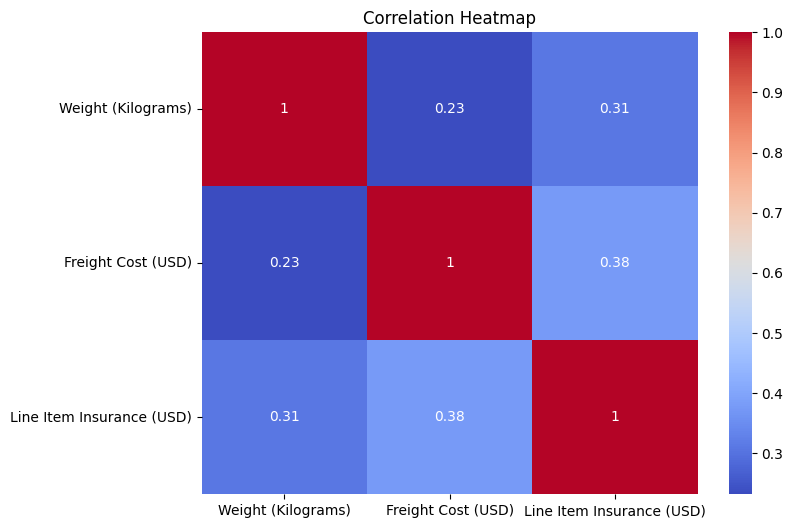

In [65]:
# 5. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fed_df[['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?


1. **To Understand Relationships Between Key Variables:**  
   - A **correlation heatmap** shows how **shipment weight**, **freight cost**, and **line item insurance** are connected. This helps in identifying which factors influence each other the most.    

2. **To Support Better Business Decisions:**  
   - Understanding how weight affects both shipping and insurance costs can help FedEx optimize pricing strategies and offer better service recommendations.  

.  **To Simplify Complex Data Analysis:**  
   - The heatmap condenses complex data into an easy-to-read format, making it clear which variables need attention for improving efficiency and profitability.  



##### 2. What is/are the insight(s) found from the chart?

### **Insights from Correlation Heatmap (Chart 5):**  
**Variables:**  **Shipment Weight**, **Freight Cost**, **Line Item Insurance**  

---


1. **Shipment Weight and Freight Cost Have a Strong Positive Correlation:**  
   - Heavier shipments lead to **higher freight costs**. This is expected because shipping heavier items requires more fuel, space, and handling, which increases costs.  

2. **Shipment Weight and Line Item Insurance Are Positively Correlated:**  
   - As the **weight of a shipment** increases, the **insurance cost** also rises. This could mean that heavier shipments are often more valuable or fragile, requiring higher insurance coverage.  

3.  **Freight Cost and Line Item Insurance Show a Positive Correlation:**  
   - **Higher shipping costs** are linked to **higher insurance costs**, possibly because costly shipments may include valuable items that need more protection.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### **Will the Gained Insights Help Create a Positive Business Impact?**  

**Yes, here’s how:**  

1. **Improved Pricing Strategies:**  
   - Since **shipment weight** directly influences **freight cost** and **insurance charges**, FedEx can develop more accurate and transparent pricing models. This ensures customers are charged fairly, improving customer trust and retention.  

2.**Customized Shipping and Insurance Plans:**  
   - FedEx can offer **bundled services** where customers shipping heavier or high-value items get tailored insurance packages. This could increase revenue from insurance services.  

3. **Optimized Operational Planning:**  
   - Understanding these correlations helps in **capacity planning**. For example, heavier shipments that generate more revenue could be prioritized for faster, premium services.  

---

### **Insights That Could Lead to Negative Growth (with Reasons):**  

1. **Higher Costs for Heavy Shipments:**  
   - If shipping and insurance costs for heavier items become **too high**, customers might switch to competitors offering better rates, especially for bulk shipments.  

2. **Price Sensitivity in Certain Markets:**  
   - In **price-sensitive regions**, the strong link between weight and cost might discourage customers from shipping heavier goods, reducing FedEx’s market share.  
.  

4. **Over-Reliance on High-Value Shipments:**  
   - If FedEx focuses only on high-profit, heavier shipments due to their correlation with higher revenue, it may lose out on volume from lighter, regular shipments that provide steady cash flow.  



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### **Solution to Achieve Business Objective for FedEx Logistics**  

---

### **1. Optimize Shipping Costs**

- **Insight-Based Action:** Since heavier shipments lead to higher freight and insurance costs, FedEx can introduce **weight-based discounts** for bulk shipments.  
- **Business Impact:** Attracts cost-conscious clients, increasing shipment volumes without compromising profitability.  

---

### **2. Improve Delivery Performance**  
- **Insight-Based Action:** Focus on **shipment modes** with lower delays and enhance logistics for underperforming modes by partnering with reliable local carriers.  
- **Business Impact:** Reduces delivery delays, improving customer satisfaction and repeat business.  

---

### **3. Reduce Delivery Delays by Country**  
- **Insight-Based Action:**  
   - Analyze high-delay countries and invest in **local infrastructure** or **regional hubs**.  
   - Offer **premium services** for faster delivery in critical markets.  
- **Business Impact:** Expands market share by providing dependable shipping in delay-prone regions.  

---

### **4. Create Customized Insurance Plans**  
- **Insight-Based Action:** Offer **tiered insurance packages** based on shipment weight and value to cater to different customer needs.  
- **Business Impact:** Increases revenue from insurance services and enhances customer trust by providing flexible options.  

---

### **In Simple Words:**  
FedEx can grow its business by making shipping **cheaper for bulk orders**, **delivering faster** in delay-prone areas, offering **flexible insurance plans**, and using **smart pricing**. This keeps customers happy and loyal while ensuring profits.  



# **Conclusion**

### **Conclusion**  

The **Exploratory Data Analysis (EDA)** of FedEx logistics data has provided valuable insights into key operational areas, including shipment modes, delivery performance, cost structures, and regional delivery delays.  

The analysis revealed that:  
- **Shipment weight** strongly influences both **freight cost** and **insurance charges**, highlighting the need for optimized pricing strategies.  
- Certain **countries face higher delivery delays**, pointing to potential operational improvements in specific regions.  
- **Shipment mode performance** varies, indicating opportunities to enhance service reliability by focusing on underperforming modes.  
- A **positive correlation** between freight cost, weight, and insurance costs suggests potential for bundled service offerings to boost customer satisfaction.  

By leveraging these insights, FedEx can:  
- **Streamline operations** through weight-based pricing discounts and customized insurance plans.  
- **Improve customer satisfaction** by reducing delivery delays with targeted infrastructure investments.  
- **Maximize profitability** by adopting data-driven pricing and enhancing delivery performance across regions and shipment modes.  

In conclusion, a **data-driven approach** empowers FedEx to make strategic decisions that boost operational efficiency, enhance customer satisfaction, and drive sustainable business growth in a competitive logistics market.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***